Christopher


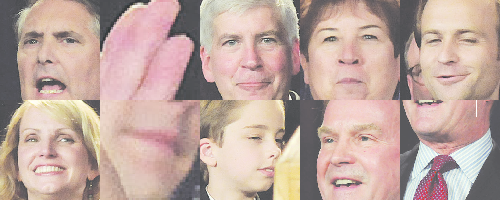

Results found in a-0.png




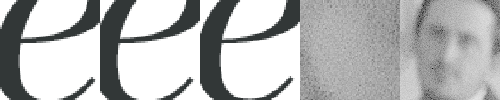

Results found in a-3.png


In [8]:
from zipfile import ZipFile
import zipfile
import PIL
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import math

with ZipFile('small_img.zip', 'r') as zipObj:
    zipObj.extractall()
        
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# the rest is up to you!

def Punctuation(string): 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
  
    return string


def getList(image):
    text = pytesseract.image_to_string(image)
    text = Punctuation(text)    
    text = text.split("\n")
    for i in text:
         if i=='' or i==' ':
            text.remove(i)
    t= " "
    t = t.join(text)
    t = Punctuation(t)
    t = t.split()
    return t


def getWord(word, image):
    wordList = getList(image)
    if word in wordList:
        return True
    else:
        return False


def findFaces(imagePath, image):
    cv_img = cv.imread(imagePath)
    faces = face_cascade.detectMultiScale(cv_img, 1.15)
    height = 100*(math.ceil(len(faces)//5))
    contact_sheet = PIL.Image.new('RGB', (500,height))
    drawing=ImageDraw.Draw(image)
    a = 0
    b = 0
    for x,y,w,h in faces:
        temp = image.crop((x,y,x+w,y+h))
        temp = temp.resize((100, 100), Image.NEAREST)
        contact_sheet.paste(temp, (a, b))
        if a+temp.width == contact_sheet.width:
            a = 0
            b = b + temp.height
        else:
            a = a + temp.width
        drawing.rectangle((x,y,x+w,y+h), outline="white")
    display(contact_sheet)
    

def main():
    word = input()
    for i in range(4):
        image = Image.open("a-"+str(i)+".png")
        if (getWord(word, image)):
            findFaces("a-"+str(i)+".png", image)
            print("Results found in a-" + str(i) + ".png")
        else:
            print("")

main()